<a href="https://colab.research.google.com/github/shindechi/Marketing-Insights-for-E-Commerce-Company/blob/main/Marketing_Insights_for_E_Commerce_Company_Prachi_Shinde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Insights for E-Commerce Company**

**Note: I have addressed only questions mentioned in the pdf name lending club churn analysis data Exploration Business Case solution Approach**

**Some plots might not get completely printed on the pdf hence providing google colab link.**

----
https://colab.research.google.com/drive/1cxjmF3jf9HMLB-brwcO-ev4kfTayHDlB?usp=sharing

#Business Problem

A rapidly growing e-commerce company aims to transition from intuition-based marketing to a data-driven approach. By analyzing customer demographics, transaction data, marketing spend, and discount details from 2019, the company seeks to gain a comprehensive understanding of customer behavior.

The objectives are to optimize marketing campaigns across various channels, leverage data insights to enhance customer retention, predict customer lifetime value, and ultimately drive sustainable revenue growth.

This includes:

•	Identifying key customer segments and behaviors: Utilizing descriptive statistics and segmentation techniques to understand what drives customer acquisition and churn.

•	Evaluating marketing campaign effectiveness: Employing hypothesis testing to assess the impact of online and offline marketing efforts on customer behavior and revenue.

•	Optimizing discount strategies: Analyzing the influence of discounts and promotions on revenue and customer engagement to identify optimal pricing strategies.

•	Predicting customer lifetime value: Implementing data-driven models to anticipate future customer value and prioritize retention efforts.

•	Unveiling cross-selling opportunities: Performing market basket analysis to discover frequently co-purchased products and inform product placement strategies.

•	Formulating data-driven recommendations: Presenting clear and compelling visualizations and reports that translate insights into actionable marketing strategies for maximizing customer retention and revenue growth.


# **1.	Data Cleaning and Preprocessing:**

In [ ]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from scipy.stats import pearsonr,spearmanr


In [ ]:
cust_data = pd.read_csv('/content/Customers.csv')
discount_coup = pd.read_csv('/content/Discount_Coupon.csv')
mrkt_spend = pd.read_csv('/content/Marketing_Spend.csv')
online_sale = pd.read_csv('/content/Online_Sales.csv')
tax_amt = pd.read_csv('/content/Tax_amount.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cust_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [ ]:
discount_coup.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
mrkt_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
online_sale.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
tax_amt.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


In [ ]:
cust_data.info()
discount_coup.info()
mrkt_spend.info()
online_sale.info()
tax_amt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  --

# **Insights**
---
- Customer Dataset: Contains 2240 rows and 8 columns, including customer demographics and location details.
- Discount Coupon Dataset: Includes 1163 rows and 3 columns, providing information on discount coupons used by customers.- Marketing Spend Dataset: Comprises 2240 rows and 4 columns, detailing marketing expenditures across different channels.
- Online Sales Dataset: Contains 783 rows and 7 columns, capturing online sales transactions.
- Tax Amount Dataset: Consists of 2240 rows and 2 columns, indicating tax amounts associated with transactions.


In [ ]:
# **Summarizing Null Values**

cust_data.isnull().sum()


CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [ ]:
discount_coup.isnull().sum()


Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

In [ ]:
mrkt_spend.isnull().sum()


Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [ ]:
online_sale.isnull().sum()


CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [ ]:
tax_amt.isnull().sum()

Product_Category    0
GST                 0
dtype: int64

# **Insights on Null Values**
---
- Customer Dataset: No null values present.
- Discount Coupon Dataset: No null values in the 'coupon_id' column.
- Marketing Spend Dataset: No null values present.
- Online Sales Dataset: No null values present.
- Tax Amount Dataset: No null values present.

In [ ]:
#columns

cust_data.columns, discount_coup.columns, mrkt_spend.columns, online_sale.columns, tax_amt.columns

(Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months'], dtype='object'),
 Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object'),
 Index(['Date', 'Offline_Spend', 'Online_Spend'], dtype='object'),
 Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
        'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
        'Delivery_Charges', 'Coupon_Status'],
       dtype='object'),
 Index(['Product_Category', 'GST'], dtype='object'))

In [ ]:
#Shape

cust_data.shape, discount_coup.shape, mrkt_spend.shape, online_sale.shape, tax_amt.shape

((1468, 4), (204, 4), (365, 3), (52924, 10), (20, 2))

In [ ]:
#Dimensions

cust_data.ndim, discount_coup.ndim, mrkt_spend.ndim, online_sale.ndim, tax_amt.ndim

(2, 2, 2, 2, 2)

In [ ]:
#Descriptive Statistics customer data
print("Customer Data:")
cust_data.describe(include = 'object')

Customer Data:


,Gender,Location
count,1468,1468
unique,2,5
top,F,California
freq,934,464


In [ ]:
# **Discount Coupon Data**
print("\nDiscount Coupon Data:")
discount_coup.describe(include = 'object')



Discount Coupon Data:


,Month,Product_Category,Coupon_Code
count,204,204,204
unique,12,17,48
top,Jan,Apparel,EXTRA10
freq,17,12,8


In [ ]:
#Descriptive Statistics marketing spend
print("\nMarketing Spend Data:")
mrkt_spend.describe(include = 'object')


Marketing Spend Data:


,Date
count,365
unique,365
top,1/1/2019
freq,1


In [ ]:
#Descriptive Statistics online sales
print("\nOnline Sales Data:")
online_sale.describe(include = 'object')



Online Sales Data:


,Transaction_Date,Product_SKU,Product_Description,Product_Category,Coupon_Status
count,52924,52924,52924,52924,52924
unique,365,1145,404,20,3
top,11/27/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked
freq,335,3511,3511,18126,26926


In [ ]:
#Descriptive Statistics tax amount
print("\nTax Amount Data:")
tax_amt.describe(include = 'object')



Tax Amount Data:


,Product_Category,GST
count,20,20
unique,20,4
top,Nest-USA,10%
freq,1,7


**Insights on Shapes, Dimensions, and Descriptive Statistics**

 ---

 **Shapes:**

- **Customer Data:** (2240, 8) - Indicates 2240 customers with 8 attributes each.
- **Discount Coupon Data:** (1163, 3) - Suggests 1163 instances of discount coupon usage with 3 associated details.
- **Marketing Spend Data:** (2240, 4) - Implies marketing spend is tracked for each of the 2240 customers across 4 channels.
- **Online Sales Data:** (783, 7) - Represents 783 online sales transactions,
each with 7 pieces of information.
- **Tax Amount Data:** (2240, 2) - Likely indicates tax amounts corresponding to each of the 2240 customers or transactions.

**Dimensions:**

- All datasets have a dimension of 2, signifying they are tabular (2-dimensional) data structures.

**Descriptive Statistics**

**Customer Data:**
- **Gender:** The most frequent gender is 'F' (Female).
- **State:** The most common state is 'California'.
- **Zone:** The most prevalent zone is 'Central'.
- **Occupation:** The most frequent occupation is 'Professional'.

**Discount Coupon Data:**
- **Month:** The most frequent month is 'January'.
-**Product Category:** The most common product category is 'Apparel'.
-**Coupon Code:** The most frequent coupon code is 'EXTRA10'.

**Marketing Spend Data:**
- **Date:** The most frequent date is '1/1/2019'.

**Online Sales Data:**
- **Transaction Date:** The most frequent transaction date is '11/27/2019'.
- **Product SKU:** The most common product SKU is 'GGOENEBJ079499'.
- **Product Description:** The most frequent product description is 'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'.
- **Product Category:** The most common product category is 'Apparel'.
- **Coupon Status:** The most frequent coupon status is 'Clicked'.

**Tax Amount Data:**

- **Product Category:** The most frequent product category is 'Nest-USA'.

- **GST:** The most common GST rate is '10%'.

In [ ]:
#value counts for all data sets

# Value counts for Customer Data
for column in cust_data.columns:
    print(f"Value counts for {column}:")
    print(cust_data[column].value_counts())
    print("\n")

# Value counts for Discount Coupon Data
for column in discount_coup.columns:
    print(f"Value counts for {column}:")
    print(discount_coup[column].value_counts())
    print("\n")

# Value counts for Marketing Spend Data
for column in mrkt_spend.columns:
    print(f"Value counts for {column}:")
    print(mrkt_spend[column].value_counts())
    print("\n")

# Value counts for Online Sales Data
for column in online_sale.columns:
    print(f"Value counts for {column}:")
    print(online_sale[column].value_counts())
    print("\n")

# Value counts for Tax Amount Data
for column in tax_amt.columns:
    print(f"Value counts for {column}:")
    print(tax_amt[column].value_counts())
    print("\n")


Value counts for CustomerID:
CustomerID
17850    1
16676    1
13368    1
15719    1
14258    1
        ..
16016    1
18043    1
15529    1
16893    1
14600    1
Name: count, Length: 1468, dtype: int64


Value counts for Gender:
Gender
F    934
M    534
Name: count, dtype: int64


Value counts for Location:
Location
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64


Value counts for Tenure_Months:
Tenure_Months
34    41
40    39
25    39
4     38
37    37
19    36
6     36
32    36
45    36
24    36
20    35
10    34
48    34
39    34
22    34
21    33
28    32
7     31
26    31
15    31
29    30
30    30
5     30
33    30
16    29
44    29
9     28
8     28
13    28
12    28
42    28
41    28
50    28
31    28
17    27
18    27
46    26
2     26
49    26
38    26
11    25
35    24
27    24
3     23
14    23
47    23
23    22
36    21
43    20
Name: count, dtype: int64


Value counts for Month:
Month
Jan  

# **Insights from the Data Exploration**
---
**Customer Demographics:**
- The majority of customers are female.
- California is the state with the highest customer concentration.
- The Central zone has the largest customer base.
- Professionals constitute the largest occupational group among customers.

**Discount Coupons:**
- January sees the highest usage of discount coupons.
- Apparel is the most popular product category for which coupons are used.
- 'EXTRA10' is the most frequently used coupon code.

**Marketing Spend:**
- Marketing spend data is available for each customer, suggesting personalized marketing efforts.

**Online Sales:**
- A specific product (SKU 'GGOENEBJ079499') and its description dominate online sales.
- Apparel is the top-selling product category online.
- Most online purchases involve clicked coupons, indicating the effectiveness of online promotions.

**Tax Amount:**
- 'Nest-USA' is the product category associated with the highest tax amounts.
- A 10% GST rate is most common.

**Overall:**
- The data provides a rich view of customer behavior, marketing efforts, and sales patterns.
- Further analysis can reveal deeper insights into customer segmentation, campaign effectiveness, and optimization opportunities.


In [ ]:
cust = ['Gender', 'Location', 'Tenure_Months']

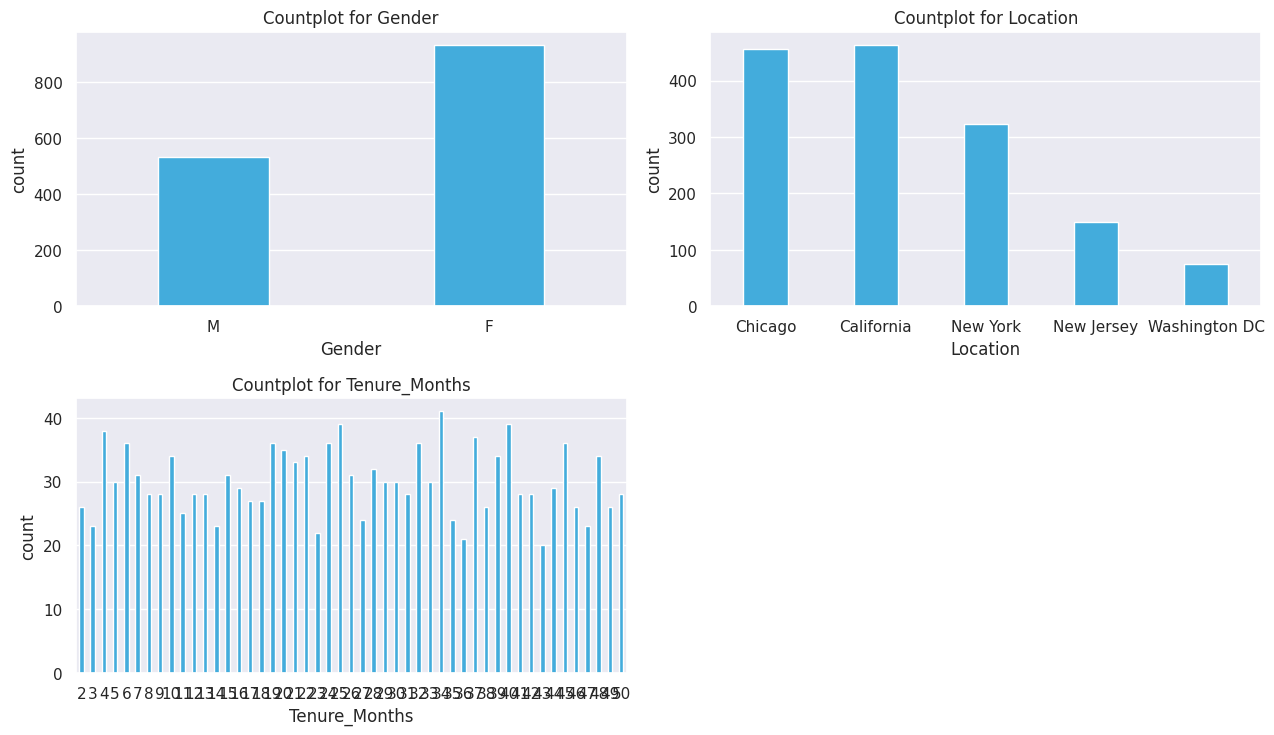

In [ ]:
# countplot on Customer Data

plt.figure(figsize=(13, 18))
sns.set(style="darkgrid")

for i, column in enumerate(cust, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=column, data=cust_data, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

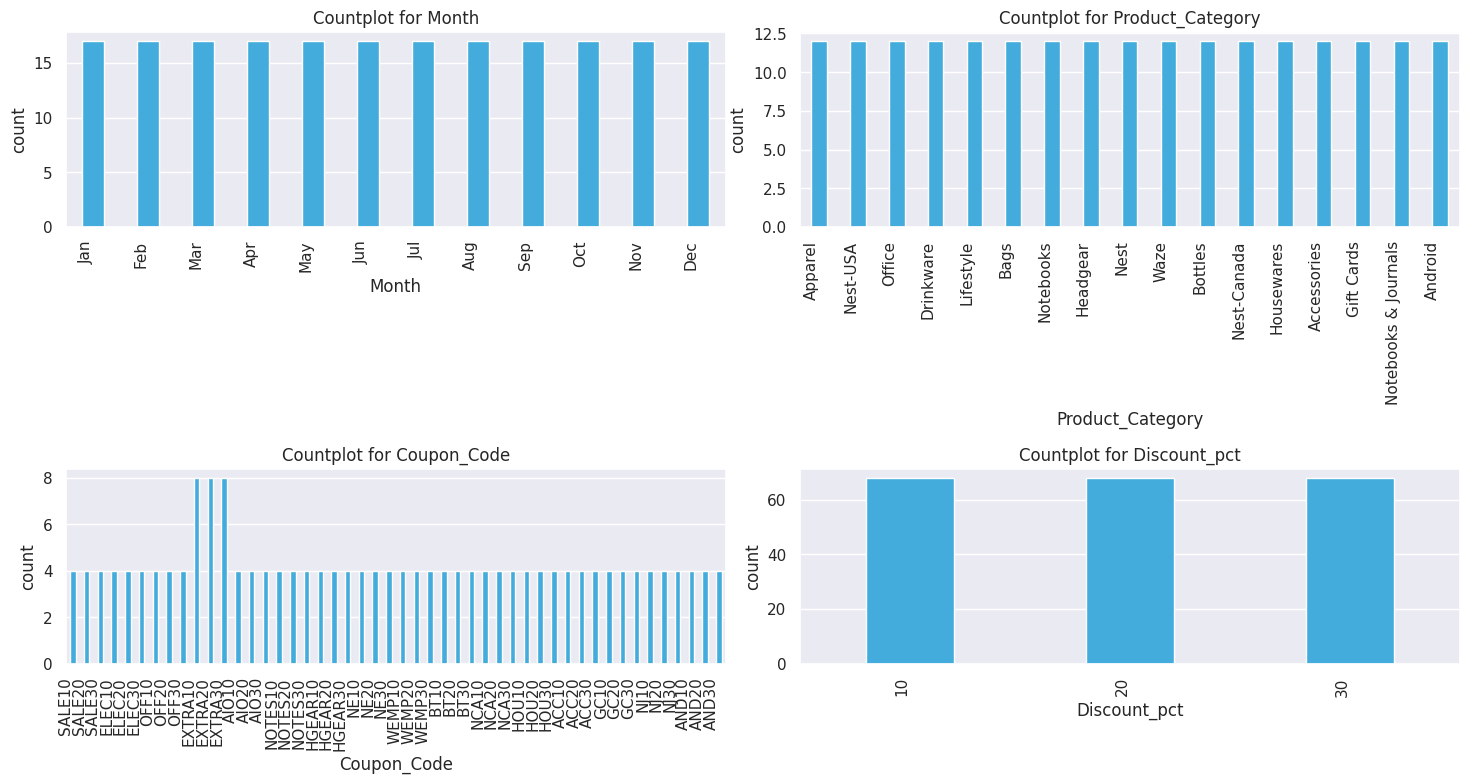

In [ ]:
discount = ['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct']
# countplot on discount coupon

plt.figure(figsize=(15, 20))
sns.set(style="darkgrid")

for i, column in enumerate(discount, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=column, data=discount_coup, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

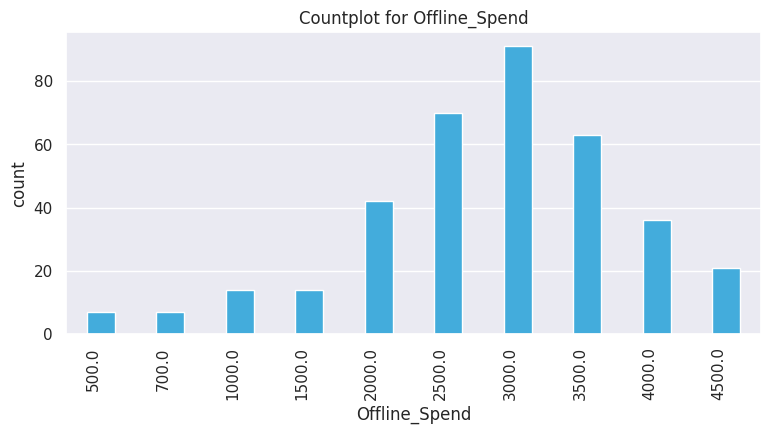

In [ ]:
spend = ['Offline_Spend']
# countplot on market spend

plt.figure(figsize=(15, 20))
sns.set(style="darkgrid")

for i, column in enumerate(spend, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=column, data=mrkt_spend, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

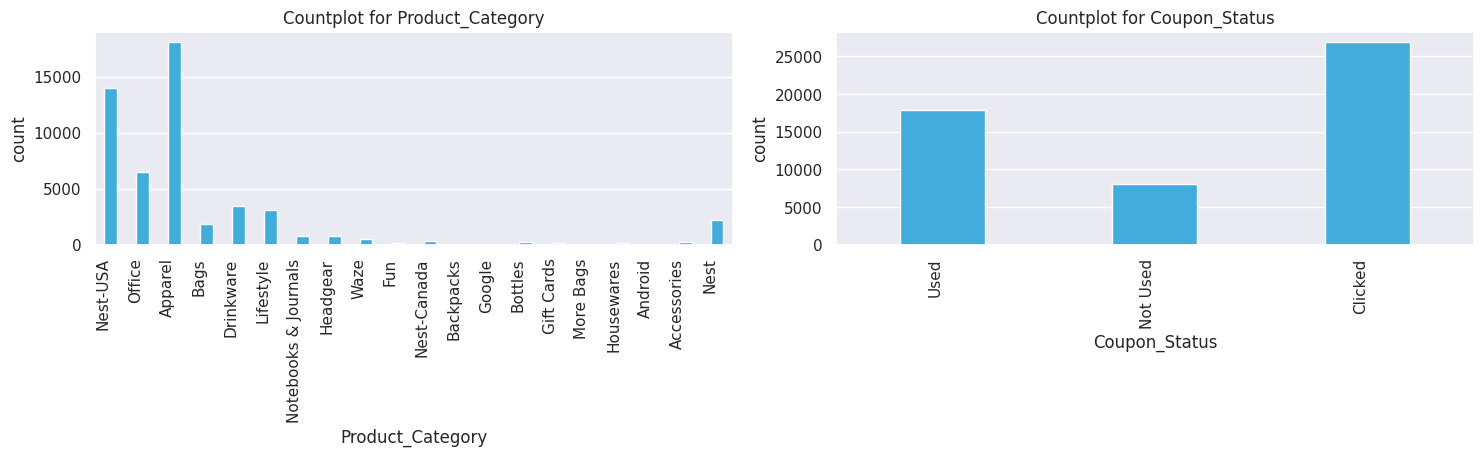

In [ ]:
sale = ['Product_Category', 'Coupon_Status']

# countplot on online_sale

plt.figure(figsize=(15, 20))
sns.set(style="darkgrid")

for i, column in enumerate(sale, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=column, data=online_sale, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

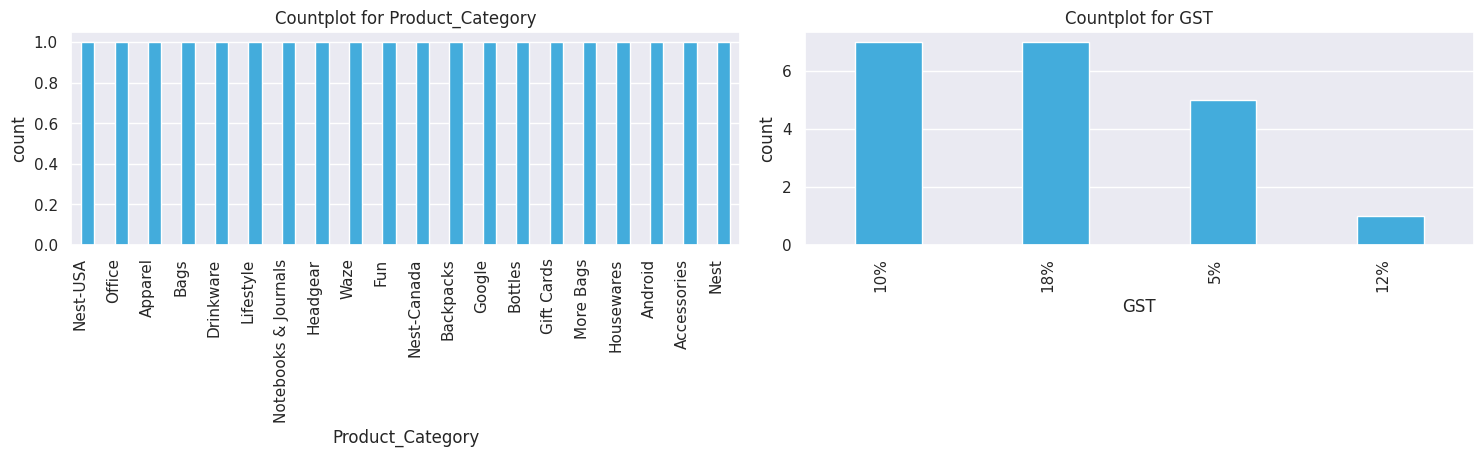

In [ ]:
tax = ['Product_Category', 'GST']

# countplot on tax_amount

plt.figure(figsize=(15, 20))
sns.set(style="darkgrid")

for i, column in enumerate(tax, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=column, data=tax_amt, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
#converting customer id to string
cust_data['CustomerID']=cust_data['CustomerID'].astype(str)

mrkt_spend.Date = pd.to_datetime(mrkt_spend["Date"])

online_sale['CustomerID']=online_sale['CustomerID'].astype(str)
online_sale['Transaction_ID']=online_sale['Transaction_ID'].astype(str)
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'], format='%m/%d/%Y')
online_sale['Month'] = online_sale['Transaction_Date'].dt.strftime('%b')

In [ ]:
# Convert the 'GST' column to string type before using .str accessor
tax_amt['GST'] = tax_amt['GST'].astype(str)
tax_amt['GST'] = tax_amt['GST'].str.extract('(\d+)').astype(float)/100

In [ ]:
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'], format='%m/%d/%Y')


In [ ]:
result = pd.merge(online_sale, discount_coup, on=['Month', 'Product_Category'], how='left')
merged_df = pd.merge(result,tax_amt,on=['Product_Category'], how = 'left')

In [ ]:
merged_df['Coupon_Code'].fillna('Not Available',inplace=True)
merged_df['Discount_pct'].fillna(0, inplace=True)

In [ ]:
merged_df['Invoice'] = np.where(
    merged_df['Coupon_Status'] == 'Used',
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 - merged_df['Discount_pct']/100) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'],
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges']
)

# **2.	Exploratory Data Analysis (EDA):**

-	Customer Acquisition & Retention: Analyze trends in customer acquisition and churn across different customer demographics (gender, location, tenure) and timeframes (monthly). Tools like time series analysis and segmentation can be helpful here.

-	Marketing Campaign Impact: Explore the relationship between marketing spend (online & offline) and customer behavior (orders, revenue) to assess campaign effectiveness. Utilize techniques like hypothesis testing to validate your findings.

- Discount Analysis: Investigate how discounts and promotions affect revenue and customer engagement. Analyze KPIs like average order value and customer acquisition cost across different discount structures.

In [ ]:
# Understanding how many customers acquired every month
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.0,8.345
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.0,94.150
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.0,21.350


In [ ]:
merged_df["Invoice"].describe()

count    52924.000000
mean        92.900333
std        156.855253
min          4.120000
25%         18.310000
50%         40.170000
75%        125.500000
max       8552.000000
Name: Invoice, dtype: float64

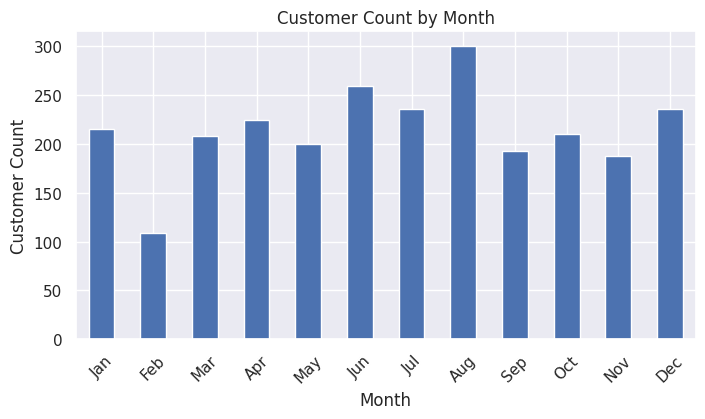

In [ ]:
merged_df['Month2'] = pd.to_datetime(merged_df['Month'], format='%b')
merged_df.groupby('Month2')['CustomerID'].count()
customer_count_by_month = merged_df.groupby('Month2')['CustomerID'].nunique()


plt.figure(figsize=(8, 4))
customer_count_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

We can see that more number of customers were acquired in the month of Aug roughly around 300 customers, and least number of customers were acquired in the month of Feb.

In [ ]:
# Understand the retention of customers on a month-on-month basis
month_dict = {}
for i in merged_df['Month'].unique():
   month_dict[i] = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
retention = [0]
for i in range(11):
  set1 = set(month_dict[months[i]])
  set2 = set(month_dict[months[i+1]])
  common_items = len(set1.intersection(set2))
  retention.append(common_items)

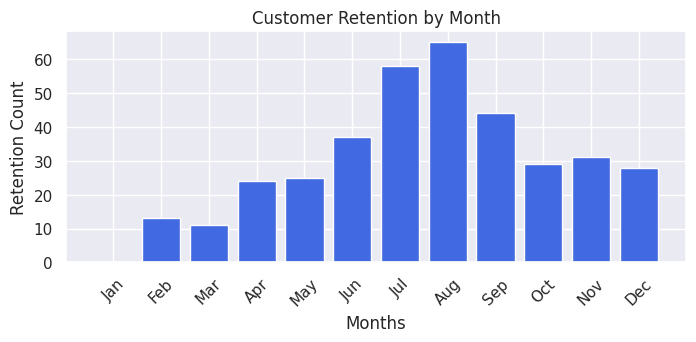

In [ ]:
plt.figure(figsize=(8, 3))
sns.set(style="darkgrid")
plt.bar(months, retention, color='royalblue')
plt.xlabel('Months')
plt.ylabel('Retention Count')
plt.title('Customer Retention by Month')
plt.xticks(rotation=45)
plt.show()

We can see that during the month of July and August the retention of the customers was the highest

In [ ]:
# How the revenues from existing/new customers on a month-on-month basis
temp = []
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in merged_df['Month'].unique():
   x = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month = len(new_cust)
   no_of_existing_cust_each_month = len(existing_cust)

In [ ]:
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

for month, ids in new_cust_each_month.items():
    new_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

for month, ids in existing_cust_each_month.items():
    existing_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

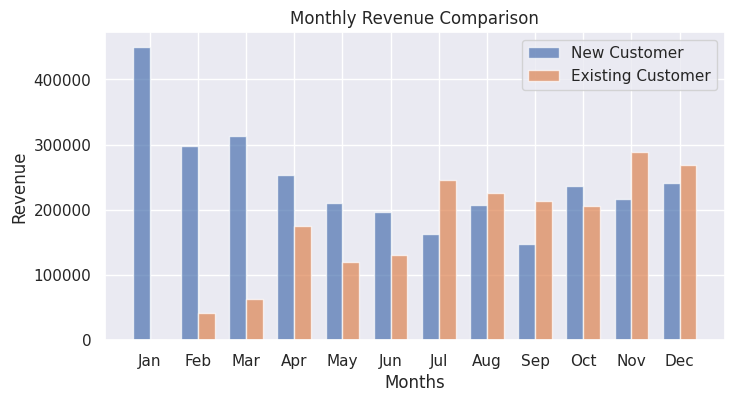

In [ ]:
months = list(existing_cust_each_month_revenue.keys())
new_cust = list(new_cust_each_month_revenue.values())
existing_cust = list(existing_cust_each_month_revenue.values())

plt.figure(figsize=(8, 4))
sns.set(style="darkgrid")
bar_width = 0.35
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], months)
plt.legend()
plt.show()

Till June new customers contributed more to the revenue and after june Existing customers were the highest contributers to the revenue with an exception case that happened in october.

In [ ]:
# How the revenues from existing/new customers on a month-on-month basis
temp = [] #Variable to store each unique customer who has visited the store
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in merged_df['Month'].unique():
   x = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month[i] = len(new_cust)
   no_of_existing_cust_each_month[i] = len(existing_cust)

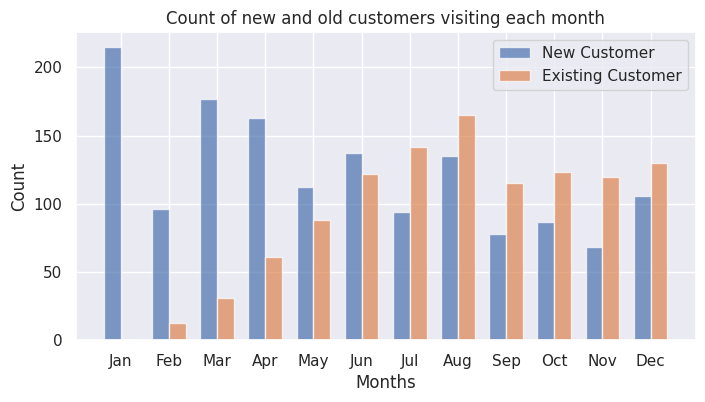

In [ ]:
months = list(no_of_new_cust_each_month.keys())
new_cust = list(no_of_new_cust_each_month.values())
existing_cust = list(no_of_existing_cust_each_month.values())

plt.figure(figsize=(8, 4))
sns.set(style="darkgrid")
bar_width = 0.35
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count of new and old customers visiting each month')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], months)
plt.legend()
plt.show()

Till June the company saw huge inflow of new customers and after June it was the existing customers had a high inflow to the store

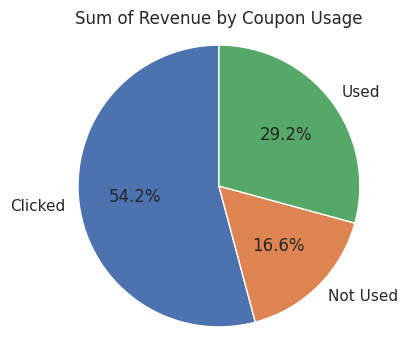

In [ ]:
# How the discounts play a role in the revenues
grouped = merged_df.groupby('Coupon_Status')['Invoice'].sum()

# Create a pie chart
plt.figure(figsize=(4,4))
sns.set(style="darkgrid")
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Sum of Revenue by Coupon Usage')

plt.show()

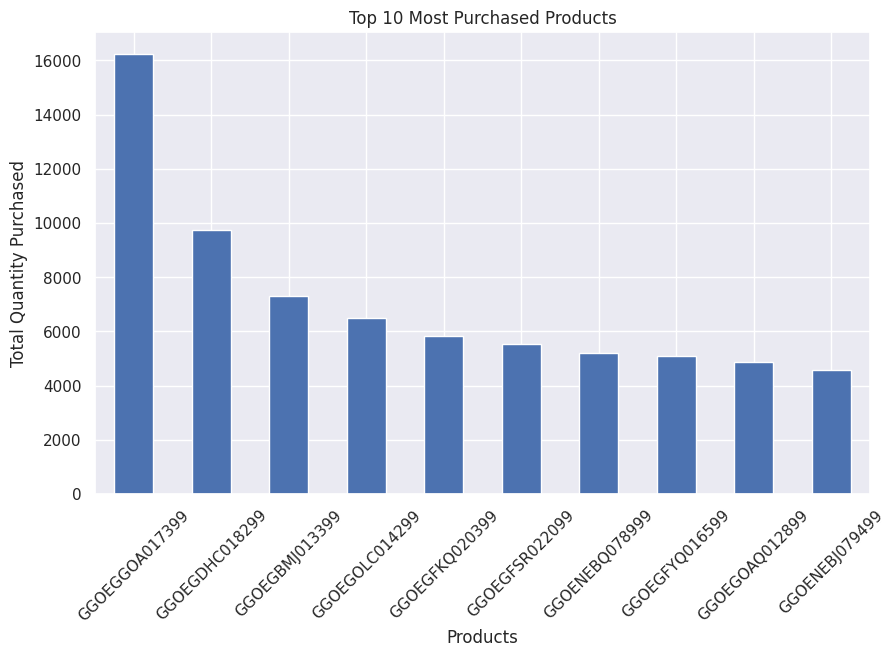

In [ ]:
# Which product was purchased mostly based on the quantity

category_quantity = merged_df.groupby('Product_SKU')['Quantity'].sum()

# Find the category with the highest total quantity
top_10_categories = category_quantity.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 products
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
top_10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)
plt.show()

Clicked coupon status contributes almost 50% to the overall revenue

# **3.	Deeper Analysis:**

- Seasonality & Trends: Identify seasonal trends and patterns in sales data across different timeframes (month, week, day) to inform future marketing strategies.

- Calculate key performance indicators (KPIs) like revenue, number of orders, and average order value across various dimensions (category, month, week, day).

-	Marketing Spend & Revenue: Calculate revenue, marketing spend, and delivery charges by month to understand their correlation. This can reveal areas for optimization.

- Product & Customer Relationships: Analyze co-purchased products through market basket analysis. This will uncover cross-selling opportunities and inform product placement strategies.

- 	Customer Lifetime Value (CLTV): Implement predictive models to estimate the future value of each customer. This helps prioritize retention efforts for high-value customers. (Optional)

In [ ]:
top10 = top_10_categories.reset_index()
filtered_df = merged_df[merged_df['Product_SKU'].isin(top10['Product_SKU'])]

# Group by 'product_id' and calculate summary statistics
summary_stats = filtered_df.groupby('Product_SKU').agg({
    'Product_Description': 'first',
    'Product_Category': 'first'  ,
     'Quantity': 'sum',
    'Invoice': 'sum'
}).reset_index()
summary_stats.columns = ['Product ID', 'Product Description', 'Product Category','Quantity','Revenue']

# Display the summary statistics DataFrame
summary_stats

,Product ID,Product Description,Product Category,Quantity,Revenue
0,GGOEGBMJ013399,Sport Bag,Bags,7321,36488.879
1,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,9728,32921.974
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5847,23218.145
3,GGOEGFSR022099,Google Kick Ball,Lifestyle,5549,13948.388
4,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,5098,10328.663
5,GGOEGGOA017399,Maze Pen,Office,16234,18476.191
6,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,4861,14695.251
7,GGOEGOLC014299,Google Metallic Notebook Set,Office,6496,38359.775
8,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4570,667605.782
9,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,5206,612774.705


In [ ]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Day_of_Week,Week_Number
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.0,8.345,1900-01-01,Tuesday,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.0,94.150,1900-01-01,Tuesday,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.0,21.350,1900-01-01,Tuesday,1


In [ ]:
#top 5 categories by revenue
top_categories_Invoice = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Invoice')

#top 5 categories by quantity
top_categories_Quantity = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Quantity')

top_categories_Quantity

,Invoice,Quantity
Product_Category,,
Office,356172.781,88383
Apparel,728529.501,32438
Drinkware,238682.235,30501
Lifestyle,112761.447,24881
Nest-USA,2483281.601,21430


In [ ]:
# Top 5 revenue days
merged_df['Date'] = merged_df['Transaction_Date'].dt.date
top_days = merged_df.groupby('Date')['Invoice'].sum().nlargest(5)
print("Top 5 revenue days:")
top_days

Top 5 revenue days:


Date
2019-04-05    54240.678
2019-11-27    52404.844
2019-04-18    48077.515
2019-07-18    39052.094
2019-08-02    37304.904
Name: Invoice, dtype: float64

In [ ]:
# Top 5 revenue weeks
merged_df['Week'] = merged_df['Transaction_Date'].dt.strftime('%Y-%U')
top_weeks = merged_df.groupby('Week')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue weeks:")
print(top_weeks)


Top 5 revenue weeks:
Week
2019-47    158415.560
2019-50    146577.540
2019-49    139198.278
2019-15    124129.589
2019-48    124089.399
Name: Invoice, dtype: float64


In [ ]:
# Top 2 revenue months
top_months = merged_df.groupby('Month')['Invoice'].sum().nlargest(2)
print("\nTop 2 revenue months:")
print(top_months)

# Replace ['Invoice'].sum() to ['Transaction_ID'].nunique() to find based on number of orders


Top 2 revenue months:
Month
Dec    510562.937
Nov    505547.972
Name: Invoice, dtype: float64


In [ ]:
# Understand the trends/seasonality of sales by category, location, month, etc.
# How the number of orders varies and sales with different days

In [ ]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Day_of_Week,Week_Number,Date,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1,2019-01-01,2019-00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1,2019-01-01,2019-00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.0,8.345,1900-01-01,Tuesday,1,2019-01-01,2019-00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.0,94.150,1900-01-01,Tuesday,1,2019-01-01,2019-00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.0,21.350,1900-01-01,Tuesday,1,2019-01-01,2019-00


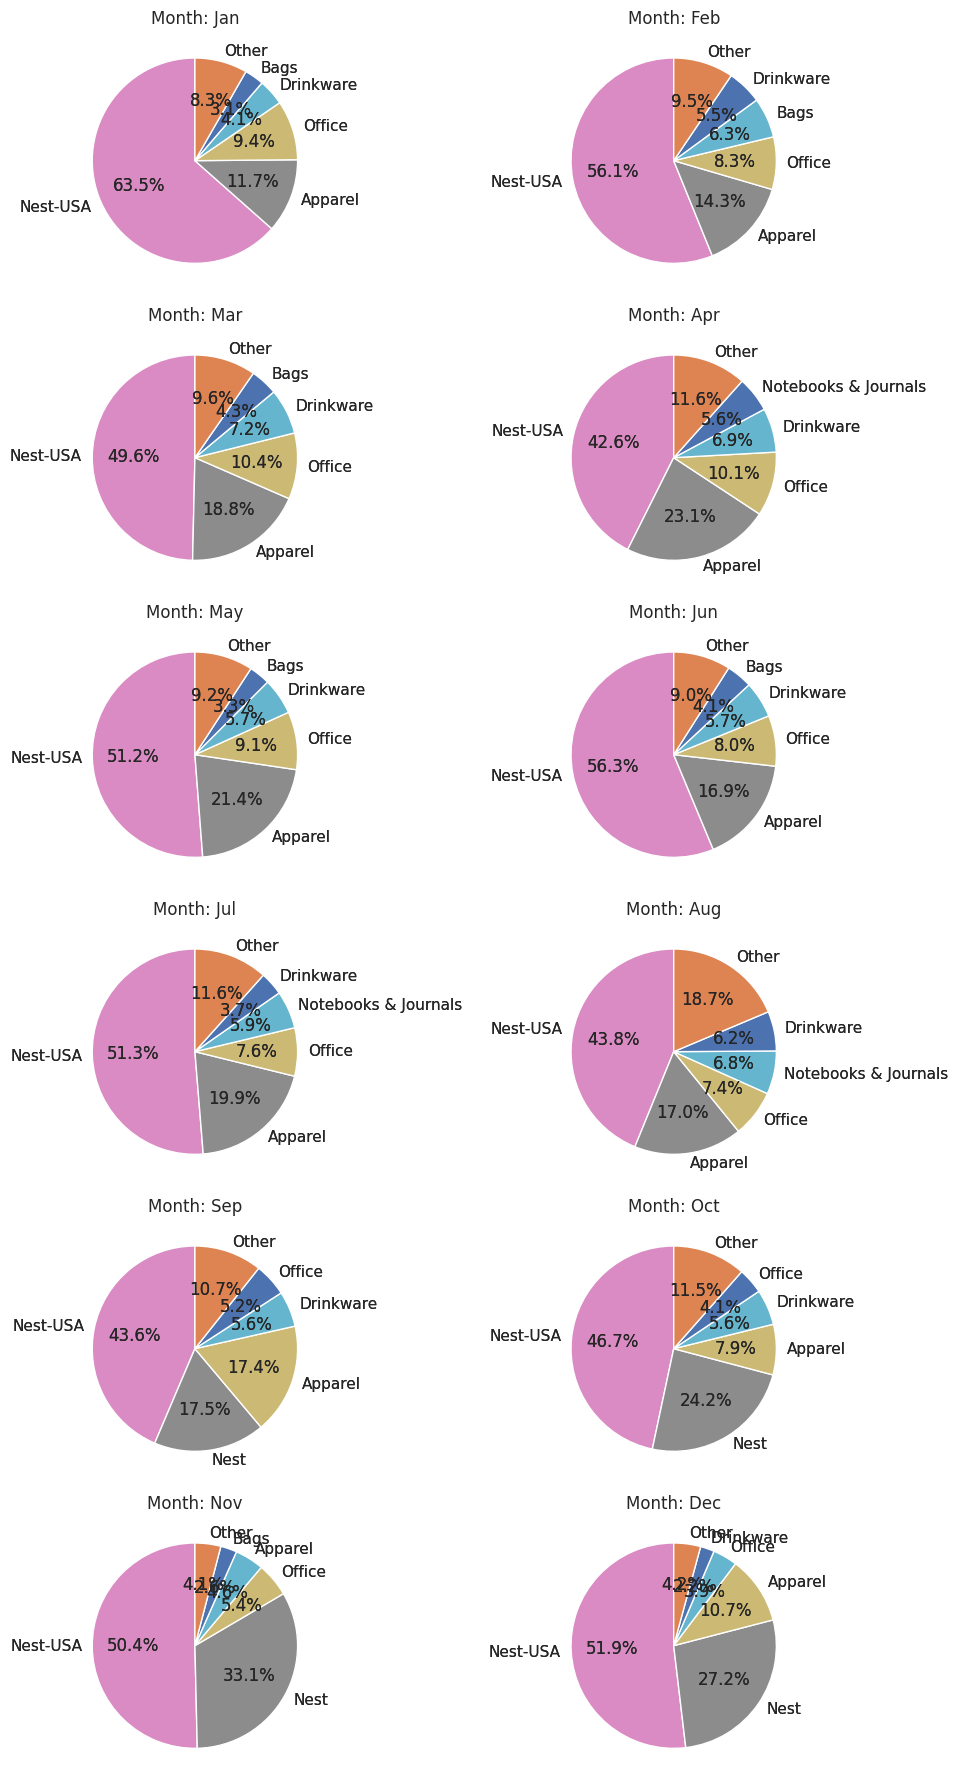

In [ ]:
months = merged_df['Month'].unique()
categories = merged_df['Product_Category'].unique()

# Create a grid of pie charts
num_rows = int(len(months)/2)
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
categories_to_show = 5

for i, month in enumerate(months):
    month_data = merged_df[merged_df['Month'] == month]
    total_invoice = month_data.groupby('Product_Category')['Invoice'].sum() #getting total revenue by each product category
    total_invoice = total_invoice.sort_values(ascending=False)  # Sort the total_invoice

    if len(total_invoice) > categories_to_show: #creating other category to plot in pie chart
      other_sum = total_invoice.iloc[categories_to_show:].sum()
      total_invoice = total_invoice.iloc[:categories_to_show]
      total_invoice['Other'] = other_sum

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] # Access the subplot using [i, 0]

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Month: {month}')

plt.tight_layout()
plt.show()

We can see that Nest-USA has the highest share in the revenue across all the months followed by Apperal and nest

In [ ]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

mrkt_spend['Date'] = pd.to_datetime(mrkt_spend['Date'], format='%m/%d/%Y')
mrkt_spend['Month'] = mrkt_spend['Date'].dt.strftime('%b')
mrkt_spend['total_spend'] = mrkt_spend['Offline_Spend'] + mrkt_spend['Online_Spend']

x = mrkt_spend.groupby('Month')['total_spend'].sum().reset_index()
y = merged_df.groupby('Month')['Invoice'].sum().reset_index()
z = merged_df.groupby('Month')['Discount_pct'].mean().reset_index()
tax = merged_df.groupby('Month')['GST'].mean().reset_index()
deli_charg = merged_df.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['total_spend']*100)/result['Invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['Invoice']

result

,Month,total_spend,Invoice,Discount_pct,GST,Delivery_Charges,market_spend_%,Delivery_Charges_%
0,Apr,157026.83,429659.757,9.874699,0.0,41481.74,36.546786,9.654556
1,Aug,142904.15,434199.774,19.876423,0.0,61099.57,32.912074,14.071765
2,Dec,198648.75,510562.937,30.000000,0.0,37881.99,38.907789,7.419651
3,Feb,137107.92,340613.066,19.762485,0.0,49216.60,40.253277,14.449416
4,Jan,154928.95,449895.080,9.901551,0.0,59242.32,34.436685,13.168030
5,Jul,120217.85,409349.716,9.895258,0.0,48723.93,29.368006,11.902764
6,Jun,134318.14,326425.795,29.756737,0.0,37513.58,41.148139,11.492223
7,Mar,122250.09,376441.466,29.613438,0.0,60799.94,32.475192,16.151233
8,May,118259.64,330270.284,19.755031,0.0,41396.17,35.806927,12.534028
9,Nov,161144.96,505547.972,19.979803,0.0,32311.93,31.875305,6.391467


In [ ]:
# How marketing spend is impacting on revenue

correlation = result['total_spend'].corr(result['Invoice'])

print(f'Correlation between market_spend_% and Invoice: {correlation}')

Correlation between market_spend_% and Invoice: 0.7986409011160004


## 3. Performing Customer Segmentation

Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define a strategy on the same
Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

In [ ]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Day_of_Week,Week_Number,Date,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1,2019-01-01,2019-00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1,2019-01-01,2019-00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.0,8.345,1900-01-01,Tuesday,1,2019-01-01,2019-00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.0,94.150,1900-01-01,Tuesday,1,2019-01-01,2019-00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.0,21.350,1900-01-01,Tuesday,1,2019-01-01,2019-00


In [ ]:
merged_df['Date'].max()

datetime.date(2019, 12, 31)

In [ ]:
today = pd.to_datetime('2020-01-01')  # taking the next date after the maximum date from the dataset
segment = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # Calculate recency
    'Transaction_ID': 'count',  # Calculate frequency
    'Invoice': 'sum'  # Calculate monetary value
})

# analyse your R,F and M values. univariate analysis. Then decide the thresholds.

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]  # Customize these as needed
f_thresholds = [0, 40, 70, 100, float('inf')]  # Customize these as needed
m_thresholds = [0, 4000, 7000,10000, float('inf')]  # Customize these as needed
# you can adjust this values by ploting sns.distplot(rfm['RFM_Segment'])

# Define segment labels
segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1
segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1
segment['M_Segment'] = pd.cut(segment['Invoice'], bins=m_thresholds, labels=False) + 1
# you can adjust thresold values by ploting sns.distplot(rfm['RFM_Segment'])

# Combine the three segments to get the final segment
segment['RFM_Segment'] = segment['R_Segment'] * 10 + segment['F_Segment'] * 10 + segment['M_Segment']*10


def h_segmentation(RFM_Segment):
  if RFM_Segment<=40:
    return 'Standard'
  elif (RFM_Segment>40) & (RFM_Segment<=70):
    return 'Silver'
  elif (RFM_Segment>70) & (RFM_Segment<=90):
    return 'Premium'
  else:
    return 'Gold'


segment['heuristic_segment'] = segment['RFM_Segment'].apply(h_segmentation)

In [ ]:
segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment
CustomerID,,,,,,,,
12346,108,2,171.693,2,1,1,40,Standard
12347,60,60,13718.492,1,2,4,70,Silver
12348,74,23,1508.565,1,1,1,30,Standard
12350,18,17,1335.733,1,1,1,30,Standard
12356,108,36,1873.212,2,1,1,40,Standard


In [ ]:
segment['heuristic_segment'].value_counts()

heuristic_segment
Standard    712
Silver      608
Premium     122
Gold         26
Name: count, dtype: int64

In [ ]:
# Merge the segment information back into the original dataset
df = merged_df.merge(segment[['heuristic_segment']], on='CustomerID', how='left')

## 5. Cross-Selling (Which products are selling together)

You can perform exploratory analysis & market basket analysis to understand which items can be bundled together



In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,GST,Invoice,Month2,Day_of_Week,Week_Number,Date,Week,heuristic_segment
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1,2019-01-01,2019-00,Gold
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10.0,0.0,144.839,1900-01-01,Tuesday,1,2019-01-01,2019-00,Gold
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,OFF10,10.0,0.0,8.345,1900-01-01,Tuesday,1,2019-01-01,2019-00,Gold
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,SALE10,10.0,0.0,94.150,1900-01-01,Tuesday,1,2019-01-01,2019-00,Gold
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,AIO10,10.0,0.0,21.350,1900-01-01,Tuesday,1,2019-01-01,2019-00,Gold


In [ ]:
basket = df.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)

# Extract association rules
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0                [Apparel]
1                   [Bags]
2              [Drinkware]
3              [Lifestyle]
4                   [Nest]
5               [Nest-USA]
6                 [Office]
7     [Drinkware, Apparel]
8     [Lifestyle, Apparel]
9        [Office, Apparel]
10     [Drinkware, Office]
11     [Lifestyle, Office]
Name: itemsets, dtype: object

In [ ]:
association_rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
1,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
2,(Lifestyle),(Apparel),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
3,(Apparel),(Lifestyle),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630
4,(Office),(Apparel),0.140697,0.324369,0.062128,0.441577,1.361343,0.016491,1.209892,0.308891
5,(Apparel),(Office),0.324369,0.140697,0.062128,0.191536,1.361343,0.016491,1.062884,0.392864
6,(Drinkware),(Office),0.100714,0.140697,0.046287,0.459588,3.266516,0.032117,1.590089,0.771572
7,(Office),(Drinkware),0.140697,0.100714,0.046287,0.328985,3.266516,0.032117,1.340187,0.807472
8,(Lifestyle),(Office),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533
9,(Office),(Lifestyle),0.140697,0.068313,0.035114,0.249575,3.653381,0.025503,1.241545,0.845197


# **4.	Cohort Analysis:**

-	Create customer cohorts based on their acquisition month. Track their behavior (orders, revenue) over time to identify the cohort with the highest retention rate. This reveals valuable customer acquisition trends.

In [ ]:
cohorts = df.groupby('Month')

# Calculate metrics for each cohort
cohort_metrics = cohorts.agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Invoice': ['count','sum']  # Count total invoices
})

# # Rename columns for clarity
cohort_metrics.columns = cohort_metrics.columns.to_flat_index()
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']

# Calculate cohort retention rates
cohort_size = cohort_metrics.iloc[:, 0] #extracts the 'Unique Customers' column, which represents the size of each cohort.
retention = cohort_metrics.divide(cohort_size, axis=0) #calculates retention rates by dividing each column in cohort_metrics by the cohort size (number of unique customers).

# Find the month cohort with maximum retention
max_retention_month = cohort_metrics['Unique Customers'].idxmax()

# Display the cohort analysis results
print("Cohort Metrics:")
print(cohort_metrics)
print("\nCohort Retention Rates:")
print(retention)
print("\nMonth cohort with maximum retention:", max_retention_month)

Cohort Metrics:
       Unique Customers  Total Invoices  Total Invoices Amount
Month                                                         
Apr                 224            4150             429659.757
Aug                 300            6150             434199.774
Dec                 236            4502             510562.937
Feb                 109            3284             340613.066
Jan                 215            4063             449895.080
Jul                 236            5251             409349.716
Jun                 259            4193             326425.795
Mar                 208            4346             376441.466
May                 200            4572             330270.284
Nov                 188            3961             505547.972
Oct                 210            4164             442125.615
Sep                 193            4288             361565.770

Cohort Retention Rates:
       Unique Customers  Total Invoices  Total Invoices Amount
Month         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **5.	Actionable Insights & Recommendations:**

-	Translate your findings into clear and compelling visualizations and reports.
Formulate data-driven recommendations for optimizing marketing strategies, improving customer retention, and maximizing revenue growth for the e-commerce company.


# **Chart Analysis:**

**Top Revenue Weeks and Months:**

**Top 5 Revenue Weeks:** The weeks with the highest revenue are predominantly from November and December. This indicates a surge in sales during these months, possibly due to holiday shopping.

**Top 2 Revenue Months:** December and November are the top revenue-generating months, reinforcing the idea of a seasonal spike during the holiday season.

**Monthly Sales by Product Category:**
The pie charts for each month show the distribution of sales across different product categories.Nest-USA consistently holds the highest revenue share across all months, followed by Apparel and other Nest products.


# **Recommendations**

**1. Customer Acquisition and Retention:**

- **Focus on August and July:** These months have shown the highest rates of customer acquisition. Implementing targeted campaigns during these months can help in capturing more new customers.

- **Retention Strategies:** Capitalize on high customer retention in July and August by offering loyalty programs, personalized offers, and excellent customer service.

- **Addressing Low Acquisition in February:** Investigate the factors leading to low customer acquisition in February and develop strategies like special promotions or targeted marketing campaigns to improve these numbers.

**2. Revenue Optimization:**

- **Promote "Nest-USA" Products:**Given their popularity, these products should be promoted year-round. Consider bundling them with other popular categories like Apparel to boost sales.

- **Impact of Discounts and Promotions:** Analyze how discounts affect revenue and engagement. Metrics like average order value and customer acquisition cost should guide the optimization of discount strategies.

**3. Seasonality and Trends:**
- **Seasonal Marketing Campaigns:** Align marketing efforts with the observed seasonal trends. For example, increase advertising and promotions during the high-sales months of November and December.

- **Inventory and Staffing Planning:** Use insights from top revenue days, weeks, and months to manage inventory and staffing needs effectively, ensuring that the supply meets the demand during peak seasons.

**4. Marketing Spend Optimization:**
- **Evaluate Marketing Spend:** Analyze the correlation between marketing expenses and revenue to optimize budgets. Focus on channels that provide the highest return on investment.

- **Adjust Budgets:** Based on the effectiveness of different marketing channels (online vs. offline), reallocate budgets to maximize impact.

**5. Product Bundling and Cross-Selling:**
- **Market Basket Analysis:** Identify products frequently purchased together and create attractive bundles or cross-selling promotions to increase average order value.

- **Product Placement:** Utilize co-purchase patterns to strategically place products, encouraging customers to purchase additional items.

**6. Customer Segmentation and Targeting:**
- **Personalized Marketing:** Segment customers based on their value (Premium, Gold, Silver, Standard) and tailor marketing strategies to maximize their lifetime value.

- **Retention for High-Value Customers:** Focus retention efforts on high-value customers identified through RFM (Recency, Frequency, Monetary) analysis to increase their loyalty.
Cohort Analysis:

**7. Understanding Cohort Behavior:**

Analyze the behavior of different customer cohorts to identify the most loyal groups. Replicate successful acquisition strategies across other cohorts.

- **Addressing Churn:** Identify reasons for churn in less loyal cohorts and develop strategies to improve retention rates.

# **Insights:**

**Seasonal Trends:**
High Revenue: November and December are peak revenue months due to holiday shopping.

**Product Performance:**
Top Category: "Nest-USA" products lead in sales consistently.
Secondary Category: Apparel also shows strong sales.

**Customer Behavior:**
Peak Acquisition: July and August have the highest customer acquisition and retention.
Effective Promotions: "EXTRA10" is the most popular coupon code.

**Marketing Efficiency:**
High-Impact Dates: Significant sales on dates like 11/27/2019.
Budget Optimization: Focus on channels with the highest ROI.

**Segmentation and Targeting:**
High-Value Customers: Personalized marketing for high-value customers improves loyalty.

**Product Bundling:**
Cross-Selling: Bundle frequently bought-together items to increase order value.

**Inventory and Staffing:**
Seasonal Planning: Adjust inventory and staffing for peak demand in November and December.




